In [8]:
import authorization
import matplotlib.pyplot as plt
from stravalib import Client
import pandas as pd
import scripts

client = authorization.auth()

activities = client.get_activities()
activity_list = list(activities)  



  if expires_at and datetime.utcfromtimestamp(expires_at) > datetime.utcnow():

  if expires_at and datetime.utcfromtimestamp(expires_at) > datetime.utcnow():



{'access_token': 'e959c306e8632648f8dbdecfe81592cb29a0fb64', 'refresh_token': '69d2db0c96cc3b7443ddf07aa129a6134a100f1d', 'expires_at': 1741732590}


Distance_km    2794.53
dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2024-06-01'),
  Text(1, 0, '2024-06-16'),
  Text(2, 0, '2023-07-09'),
  Text(3, 0, '2024-08-22'),
  Text(4, 0, '2024-04-07'),
  Text(5, 0, '2021-04-10'),
  Text(6, 0, '2024-04-01'),
  Text(7, 0, '2021-04-24'),
  Text(8, 0, '2023-04-15'),
  Text(9, 0, '2024-05-18')])

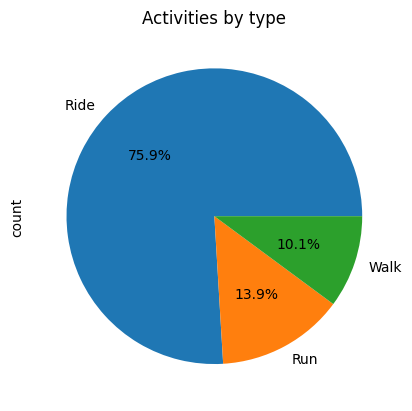

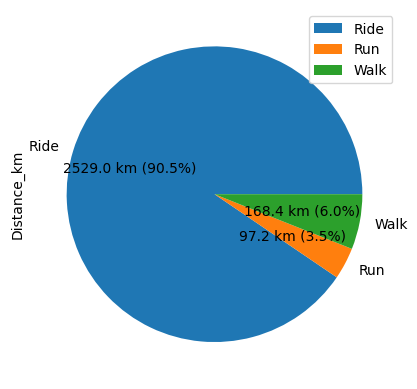

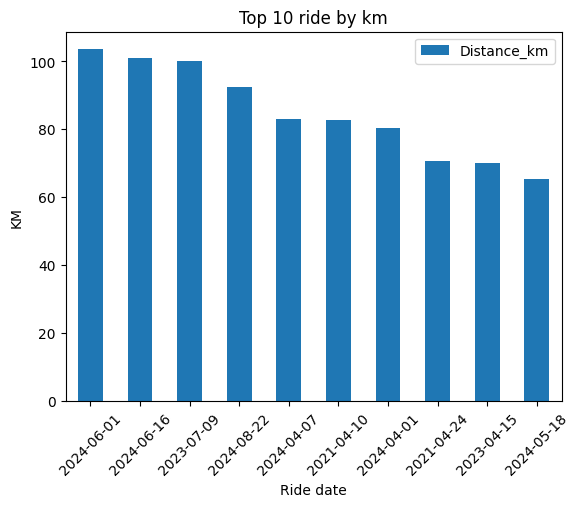

In [ ]:
df_activities = pd.DataFrame(scripts.all_activities_to_list(activities)) 

# metrus pavercia i km
df_activities['Distance_km'] = df_activities['distance'].apply(scripts.m_to_km)      
df_activities['start_date'] = df_activities['start_date'].apply(scripts.date_format)

# kazkodel sitie laukai ne kaip string ateina ir reikia konvertuot
df_activities['type'] = df_activities['type'].astype(str)
df_activities['sport_type'] = df_activities['sport_type'].astype(str)                                                   
df_activities['type'] = df_activities['type'].str.replace("root='", "").str.replace("'", "")
df_activities['sport_type'] = df_activities['sport_type'].str.replace("root='", "").str.replace("'", "")

# grupavimas pagal type ir pie chart
# df_activities.groupby('type').size().plot(kind='pie', autopct='%1.1f%%', legend=False, title='Distribution of Activities by Type')
df_activities_by_category = df_activities.value_counts('type').plot(kind='pie', autopct='%1.1f%%', title='Activities by type')
fig = df_activities_by_category.get_figure()
fig.savefig('testas.png')

# viso km
total_km = df_activities.agg({'Distance_km' : 'sum'})
print(total_km)

#kilometrai pagal kategorija pie chart

df_activities_by_km = df_activities.groupby('type').agg({'Distance_km' : 'sum'})
df_activities_by_km.plot(kind='pie', y='Distance_km', autopct=lambda p: f'{p * sum(df_activities_by_km["Distance_km"]) / 100 :.1f} km ({p:.1f}%)')

#Top 10 ride pagal km  Bar chart

df_activities_ride = df_activities[df_activities['type'] == 'Ride'].sort_values('Distance_km',ascending=False).head(10)[['start_date','Distance_km']]

df_activities_ride.plot(kind='bar',x='start_date', xlabel='Ride date', ylabel='KM', title='Top 10 ride by km')
plt.xticks(rotation=45)


                                  